In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
# Importar df downtime limpiio
TablaMaestraDowntime = pd.read_csv("/content/TablaMaestraDowntimeLW3.csv")

In [3]:
# Visualizamos el dataframe TablaMaestraDowntime
TablaMaestraDowntime

,Unnamed: 0,EventID,ScheduleID,AssetName,DownStart,DownEnd,Reason,Category,DownStart_dia,DownStart_mes,DownStart_año,Total_Duration,Fault_Number,Category_Number,ShiftNumber,OEE,Total_Time,Production_Goal,Planned_Rate,DayOfWeek
0,0,1711413,59110,Bench 100D,2024-05-01,2024-05-01,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,1,5,2024,1,35,0,3,1.0,450,135,18.00,2
1,1,1711417,59110,Bench 100D,2024-05-01,2024-05-01,Falla 12. Scanner de Seguridad Interrumpido Du...,Scanner Faults,1,5,2024,5,12,6,3,1.0,450,135,18.00,2
2,2,1711419,59110,Bench 100D,2024-05-01,2024-05-01,Falla 12. Scanner de Seguridad Interrumpido Du...,Scanner Faults,1,5,2024,55,12,6,3,1.0,450,135,18.00,2
3,3,1711421,59110,Bench 100D,2024-05-01,2024-05-01,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,1,5,2024,13,35,0,3,1.0,450,135,18.00,2
4,4,1711475,59110,Bench 100D,2024-05-01,2024-05-01,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,1,5,2024,16,35,0,3,1.0,450,135,18.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1729775,59256,Bench 100D,2024-05-21,2024-05-21,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,21,5,2024,1,35,0,1,1.0,136,155,18.24,1
1987,1987,1729779,59256,Bench 100D,2024-05-21,2024-05-21,Falla 12. Scanner de Seguridad Interrumpido Du...,Scanner Faults,21,5,2024,16,12,6,1,1.0,136,155,18.24,1
1988,1988,1729782,59256,Bench 100D,2024-05-21,2024-05-21,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,21,5,2024,36,35,0,1,1.0,136,155,18.24,1
1989,1989,1729790,59256,Bench 100D,2024-05-21,2024-05-21,Falla26. Servo Soporte Derecho Altura Fallo,Servo Support Faults,21,5,2024,29,26,0,1,1.0,136,155,18.24,1


In [4]:
# Definir las características y los transformadores
categorical_features = ['Category']
numeric_features = ['Total_Duration','Total_Time', 'Production_Goal', 'Planned_Rate',"DownStart_dia","DownStart_mes","DayOfWeek"]

In [5]:
# Transformador para escalar las características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [6]:
# Transformador para codificar características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
# Combinar los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [8]:
# Aplicar los transformadores
processed_data = preprocessor.fit_transform(TablaMaestraDowntime)

# Análisis Exploratorio de Datos (EDA) - Avance 2

Este repositorio contiene el código y la documentación asociada con el Análisis Exploratorio de Datos (EDA) realizado en un conjunto de datos específico. El objetivo de este README es proporcionar una visión general del EDA realizado y los hallazgos clave.

### A) Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:

-Generación de nuevas características

-Discretización o binning
-Codificación (ordinal, one hot,…)
-Escalamiento (normalización, estandarización, min – max,…)
-Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

## Normalización y estandarización:
Al aplicar *StandardScaler*, normalizamos las características numéricas para que tengan una media de cero y una desviación estándar de uno. Esto es importante porque muchos modelos de regresión (como la regresión lineal) asumen que las características están en la misma escala. La estandarización asegura que todas las características contribuyan de manera equitativa al modelo.
Codificación de variables categóricas:

*OneHotEncoder* se utiliza para convertir variables categóricas en una representación numérica adecuada para los modelos de regresión. Esto es necesario porque la mayoría de los modelos de regresión no pueden manejar variables categóricas directamente. La codificación one-hot crea una columna binaria para cada categoría única, lo que permite al modelo capturar las relaciones no lineales entre las categorías y la variable objetivo.

### B) Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:

-Umbral de varianza
-Correlación
-Chi-cuadrado
-ANOVA
-Análisis de componentes principales (PCA)
-Análisis factorial (FA)

## Reducción de la dimensionalidad:
El PCA se utiliza para reducir la dimensionalidad del conjunto de datos al proyectarlo en un espacio de características de menor dimensión mientras se conserva la mayor cantidad posible de la variabilidad original de los datos. Esto puede ser beneficioso cuando se trabaja con conjuntos de datos de alta dimensionalidad para reducir el riesgo de sobreajuste y mejorar la generalización del modelo. Además, al reducir la dimensionalidad, también podemos reducir el tiempo de entrenamiento del modelo y los requisitos de memoria.
La justificación de la aplicación de estos pasos específicos radica en su capacidad para mejorar la calidad de los datos y la capacidad predictiva del modelo de regresión resultante. Al normalizar y codificar adecuadamente las características y reducir la dimensionalidad del conjunto de datos, podemos preparar un conjunto de datos más limpio y estructurado que pueda ser más fácilmente interpretado por el modelo de regresión, lo que potencialmente resultará en mejores predicciones.


## Contribuciones y Contacto
Si tienes alguna pregunta o sugerencia sobre el análisis realizado o el código asociado, no dudes en contactar al equipo a través de [Julio Quintana](A01793661@tec.mx) | [Pablo Colunga] (A01793671@tec.mx) | [Marco Antonio Lopez](A01113135@tec.mx) .

¡Gracias por tu interés en nuestro análisis exploratorio de datos!

In [9]:
#Convertir el resultado a un DataFrame de pandas
processed_df = pd.DataFrame(processed_data)

In [10]:
# Obtener nombres de características one-hot
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Obtener todos los nombres de las características
feature_names = numeric_features + list(onehot_feature_names)

# Convertir la matriz procesada a un DataFrame con los nombres de las características
processed_df = pd.DataFrame(processed_data, columns=feature_names)

# Análisis Exploratorio de Datos (EDA) - Avance 2

Este repositorio contiene el código y la documentación asociada con el Análisis Exploratorio de Datos (EDA) realizado en un conjunto de datos específico. El objetivo de este README es proporcionar una visión general del EDA realizado y los hallazgos clave.

### A) Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:

-Generación de nuevas características

-Discretización o binning

-Codificación (ordinal, one hot,…)

-Escalamiento (normalización, estandarización, min – max,…)

-Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

## Normalización y estandarización:
Al aplicar *StandardScaler*, normalizamos las características numéricas para que tengan una media de cero y una desviación estándar de uno. Esto es importante porque muchos modelos de regresión (como la regresión lineal) asumen que las características están en la misma escala. La estandarización asegura que todas las características contribuyan de manera equitativa al modelo.
Codificación de variables categóricas:

*OneHotEncoder* se utiliza para convertir variables categóricas en una representación numérica adecuada para los modelos de regresión. Esto es necesario porque la mayoría de los modelos de regresión no pueden manejar variables categóricas directamente. La codificación one-hot crea una columna binaria para cada categoría única, lo que permite al modelo capturar las relaciones no lineales entre las categorías y la variable objetivo.

![One hot encoding](https://github.com/JulioQuintanaGarcia/ProyectoIntegradorE30/blob/main/images/onehot_encoding.png)


### B) Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:

-Umbral de varianza

-Correlación

-Chi-cuadrado

-ANOVA

-Análisis de componentes principales (PCA)

-Análisis factorial (FA)

Se estuvieron realizando distintintos metodos para la selección de características, como puede ser la correlación entre vriables, en donde no se observan relaciones tan fuertes, estando en el rango de -0.3 a 0.3.

![Correlación](https://github.com/JulioQuintanaGarcia/ProyectoIntegradorE30/blob/main/images/correlacion.png)



## Reducción de la dimensionalidad:
El PCA se utiliza para reducir la dimensionalidad del conjunto de datos al proyectarlo en un espacio de características de menor dimensión mientras se conserva la mayor cantidad posible de la variabilidad original de los datos. Esto puede ser beneficioso cuando se trabaja con conjuntos de datos de alta dimensionalidad para reducir el riesgo de sobreajuste y mejorar la generalización del modelo. Además, al reducir la dimensionalidad, también podemos reducir el tiempo de entrenamiento del modelo y los requisitos de memoria.

La justificación de la aplicación de estos pasos específicos radica en su capacidad para mejorar la calidad de los datos y la capacidad predictiva del modelo de regresión resultante. Al normalizar y codificar adecuadamente las características y reducir la dimensionalidad del conjunto de datos, podemos preparar un conjunto de datos más limpio y estructurado que pueda ser más fácilmente interpretado por el modelo de regresión, lo que potencialmente resultará en mejores predicciones.


![PCA](https://github.com/JulioQuintanaGarcia/ProyectoIntegradorE30/blob/main/images/PCA.png)


## Contribuciones y Contacto
Si tienes alguna pregunta o sugerencia sobre el análisis realizado o el código asociado, no dudes en contactar al equipo a través de [Julio Quintana](A01793661@tec.mx) | [Pablo Colunga](A01793671@tec.mx) | [Marco Antonio Lopez](A01113135@tec.mx) .

¡Gracias por tu interés en nuestro análisis exploratorio de datos!

In [11]:
processed_df

,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Electrical Faults,Category_Other Faults,Category_Pin Position Faults,Category_Position Sensor Faults,Category_Relay Faults,Category_Scanner Faults,Category_Servo Pin Faults,Category_Servo Support Faults
0,-0.189266,-1.114833,-1.247379,-0.549694,-1.494055,0.0,-0.180771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.148194,-1.114833,-1.247379,-0.549694,-1.494055,0.0,-0.180771,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.365195,-1.114833,-1.247379,-0.549694,-1.494055,0.0,-0.180771,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.066052,-1.114833,-1.247379,-0.549694,-1.494055,0.0,-0.180771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.035249,-1.114833,-1.247379,-0.549694,-1.494055,0.0,-0.180771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,-0.189266,-6.458916,-0.137049,-0.043048,2.092470,0.0,-0.825782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1987,-0.035249,-6.458916,-0.137049,-0.043048,2.092470,0.0,-0.825782,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1988,0.170107,-6.458916,-0.137049,-0.043048,2.092470,0.0,-0.825782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1989,0.098232,-6.458916,-0.137049,-0.043048,2.092470,0.0,-0.825782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
#Aplicar PCA
pca = PCA(n_components=10)  # Especifica el número de componentes principales deseados
pca_result = pca.fit_transform(processed_df)

In [13]:
# Obtener la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Imprimir los componentes principales y la varianza explicada
for i, variance in enumerate(variance_explained):
    print(f"Componente principal {i+1}: {variance:.2f}")

Componente principal 1: 0.37
Componente principal 2: 0.21
Componente principal 3: 0.15
Componente principal 4: 0.11
Componente principal 5: 0.08
Componente principal 6: 0.05
Componente principal 7: 0.01
Componente principal 8: 0.01
Componente principal 9: 0.01
Componente principal 10: 0.00


In [14]:
# Obtener la varianza explicada acumulada
cumulative_variance_explained = np.cumsum(variance_explained)

# Imprimir la varianza explicada acumulada
for i, variance in enumerate(cumulative_variance_explained):
    print(f"Varianza acumulada hasta el componente principal {i+1}: {variance:.2f}")

Varianza acumulada hasta el componente principal 1: 0.37
Varianza acumulada hasta el componente principal 2: 0.57
Varianza acumulada hasta el componente principal 3: 0.73
Varianza acumulada hasta el componente principal 4: 0.83
Varianza acumulada hasta el componente principal 5: 0.91
Varianza acumulada hasta el componente principal 6: 0.97
Varianza acumulada hasta el componente principal 7: 0.98
Varianza acumulada hasta el componente principal 8: 0.99
Varianza acumulada hasta el componente principal 9: 1.00
Varianza acumulada hasta el componente principal 10: 1.00


In [15]:
# Crear un DataFrame para almacenar los resultados
pca_weights_df = pd.DataFrame(pca.components_, columns=processed_df.columns)

# Imprimir los resultados
print("PCA y sus pesos por variable:")
pca_weights_df

PCA y sus pesos por variable:


,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Electrical Faults,Category_Other Faults,Category_Pin Position Faults,Category_Position Sensor Faults,Category_Relay Faults,Category_Scanner Faults,Category_Servo Pin Faults,Category_Servo Support Faults
0,0.014412,-0.567224,-0.606615,-0.417865,0.342997,0.000000e+00,0.112263,0.000089,0.001888,0.004934,0.004867,-0.000021,0.044844,-0.000532,-0.056068
1,0.158301,0.214986,0.172736,-0.261468,0.552311,-6.938894e-18,-0.718916,-0.001672,-0.001579,0.019775,-0.013431,0.004262,0.059565,0.000071,-0.066990
2,0.983828,-0.039417,-0.017897,0.109558,-0.044016,0.000000e+00,0.125628,0.000033,0.001045,-0.003858,0.004071,0.014958,-0.015132,-0.000100,-0.001016
3,-0.067915,-0.337797,-0.068778,0.807988,0.289144,1.110223e-16,-0.161832,-0.000922,0.000264,0.018157,0.006780,0.000548,0.225611,-0.000169,-0.250269
4,-0.032051,0.302382,0.238405,-0.046652,0.600063,-2.775558e-17,0.650748,-0.000179,0.005649,0.009863,-0.007711,0.001000,0.175093,0.001023,-0.184737
5,-0.027931,-0.081026,0.029392,0.224156,0.360065,-1.110223e-16,0.060532,-0.002093,0.000947,0.007735,-0.028680,-0.006111,-0.620853,-0.000444,0.649500
6,0.011098,-0.185294,0.192944,-0.046474,-0.003839,-1.110223e-16,0.007039,-0.007292,-0.020195,-0.351340,-0.533588,-0.090340,0.532589,-0.004849,0.475015
7,0.000810,-0.619210,0.708408,-0.193442,-0.028929,4.683753e-17,0.035167,0.003148,0.004965,0.071422,0.172592,0.026335,-0.132043,0.002527,-0.148945
8,0.001531,-0.024932,0.018631,-0.012829,-0.034236,-3.469447e-17,0.010885,0.004925,0.008042,0.753002,-0.643797,0.043325,-0.076116,0.001856,-0.091236
9,-0.016423,-0.000325,-0.003266,0.002579,0.001474,6.661338e-16,-0.001741,0.015038,0.046582,-0.321117,-0.271021,0.871333,-0.178110,0.009651,-0.172356


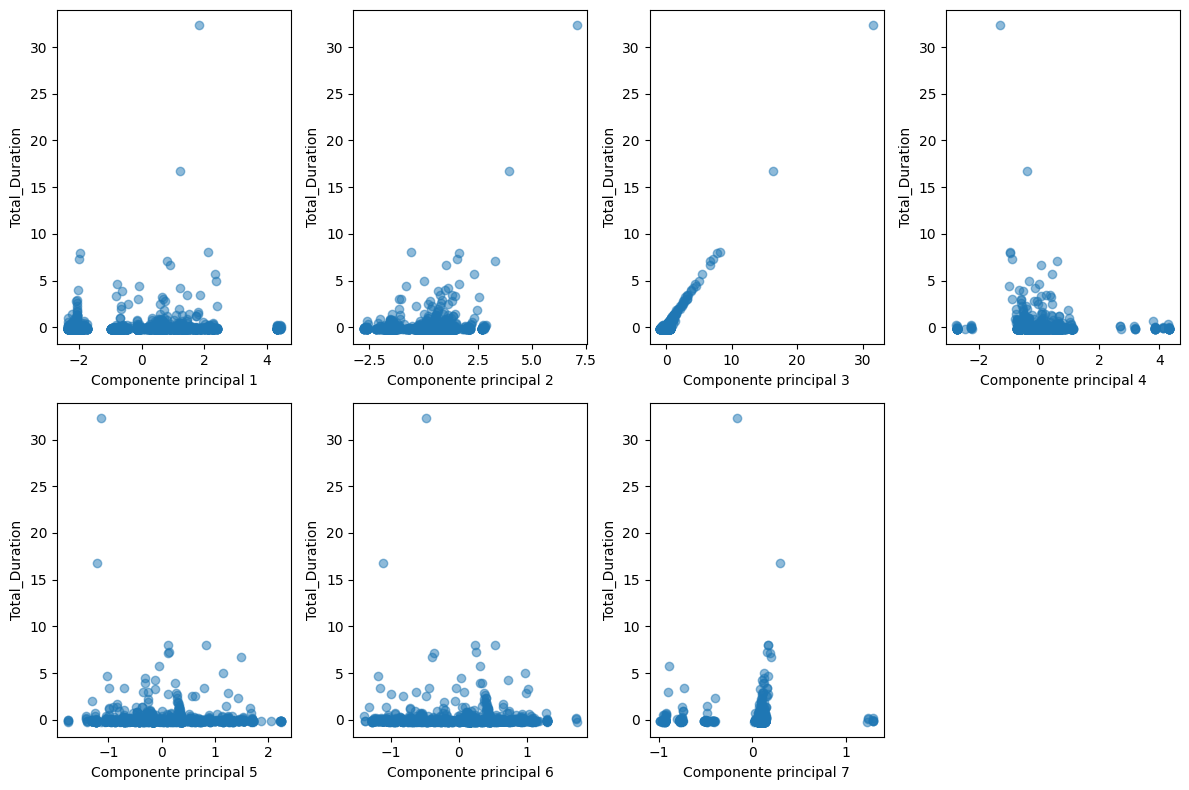

In [16]:
n_selected_components = 7  # Define el número de componentes principales que deseas seleccionar
selected_components = pca_result[:, :n_selected_components]
# Crear un gráfico de dispersión para cada componente principal vs Total_Duration
num_components = selected_components.shape[1]

plt.figure(figsize=(12, 8))
for i in range(num_components):
    plt.subplot(2, (num_components + 1) // 2, i+1)  # Se ajusta el número de columnas
    plt.scatter(selected_components[:, i], processed_df['Total_Duration'], alpha=0.5)
    plt.xlabel(f'Componente principal {i+1}')
    plt.ylabel('Total_Duration')

plt.tight_layout()
plt.show()

Desempeño en el conjunto de entrenamiento:
Error cuadrático medio (MSE): 1.1481779474599287
Error absoluto medio (MAE): 0.2691202516562185
Coeficiente de determinación (R²): 0.02495935433173546

Desempeño en el conjunto de prueba:
Error cuadrático medio (MSE): 0.3171444022304859
Error absoluto medio (MAE): 0.2371591524848863
Coeficiente de determinación (R²): -0.09210781859184936


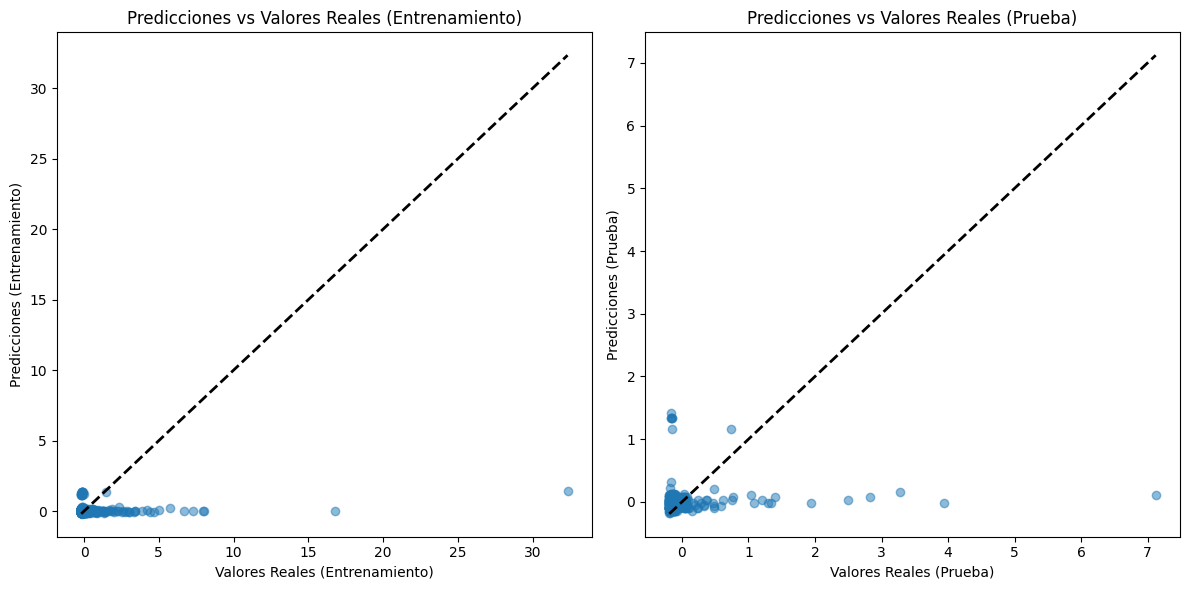

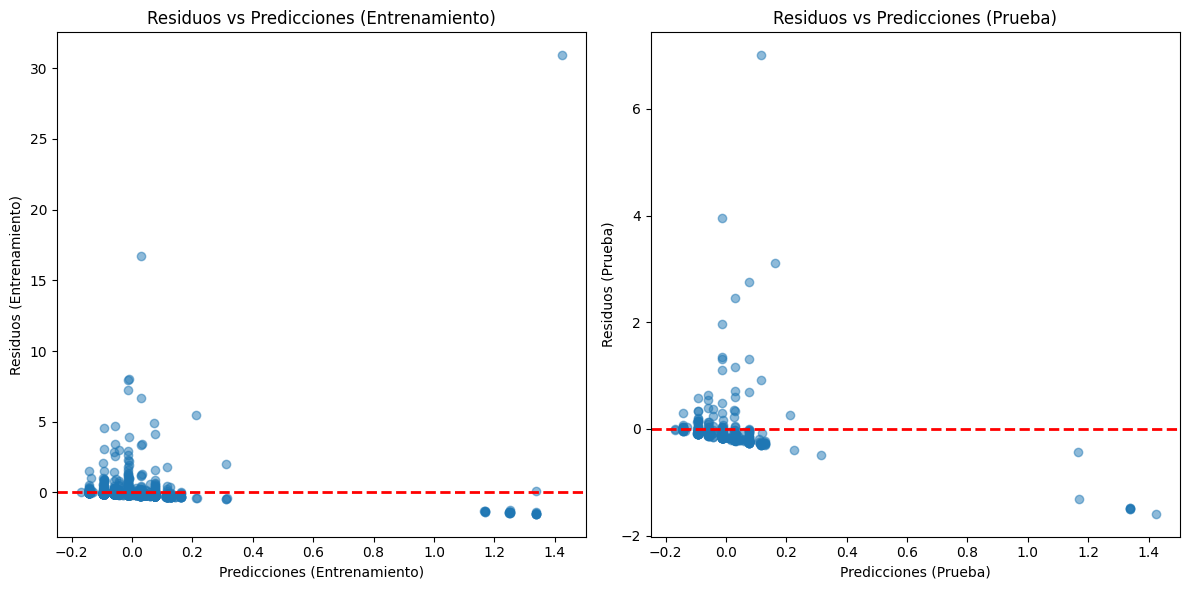

In [17]:
# Dividir los datos en conjunto de entrenamiento y prueba

X = processed_df.drop(columns=['Total_Duration'],axis=1)
Y = processed_df['Total_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

# Evaluar el modelo en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Desempeño en el conjunto de entrenamiento:")
print("Error cuadrático medio (MSE):", mse_train)
print("Error absoluto medio (MAE):", mae_train)
print("Coeficiente de determinación (R²):", r2_train)

# Evaluar el modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nDesempeño en el conjunto de prueba:")
print("Error cuadrático medio (MSE):", mse_test)
print("Error absoluto medio (MAE):", mae_test)
print("Coeficiente de determinación (R²):", r2_test)

# Crear gráficos de Predicciones vs Valores Reales para entrenamiento y prueba
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales (Entrenamiento)')
plt.ylabel('Predicciones (Entrenamiento)')
plt.title('Predicciones vs Valores Reales (Entrenamiento)')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales (Prueba)')
plt.ylabel('Predicciones (Prueba)')
plt.title('Predicciones vs Valores Reales (Prueba)')

plt.tight_layout()
plt.show()

# Crear gráficos de Residuos vs Predicciones para entrenamiento y prueba
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
residuos_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuos_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicciones (Entrenamiento)')
plt.ylabel('Residuos (Entrenamiento)')
plt.title('Residuos vs Predicciones (Entrenamiento)')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
residuos_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuos_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicciones (Prueba)')
plt.ylabel('Residuos (Prueba)')
plt.title('Residuos vs Predicciones (Prueba)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Desempeño del modelo: Decision Tree
Conjunto de Entrenamiento:
MSE: 0.40495125460028986
MAE: 0.2059139854677707
R²: 0.6561125968120718
Conjunto de Prueba:
MSE: 3.16706707447933
MAE: 0.3189061066637202
R²: -9.906005875298442


Desempeño del modelo: Random Forest
Conjunto de Entrenamiento:
MSE: 0.4995782296162823
MAE: 0.2187138145940334
R²: 0.5757547158569961
Conjunto de Prueba:
MSE: 1.5561867099441868
MAE: 0.2894933225506849
R²: -4.358832321068803


Desempeño del modelo: Gradient Boosting
Conjunto de Entrenamiento:
MSE: 0.4601373172391819
MAE: 0.21680219469340598
R²: 0.6092482111422777
Conjunto de Prueba:
MSE: 2.932173595776559
MAE: 0.30404589705932755
R²: -9.097134576220299


Desempeño del modelo: Support Vector Regressor
Conjunto de Entrenamiento:
MSE: 1.175313620968012
MAE: 0.20379210124834896
R²: 0.0019155529101023694
Conjunto de Prueba:
MSE: 0.2927791099659619
MAE: 0.17140506180336224
R²: -0.00820431596901705


Desempeño del modelo: K-Nearest Neighbors
Conjunto de Entrenamiento:
MS

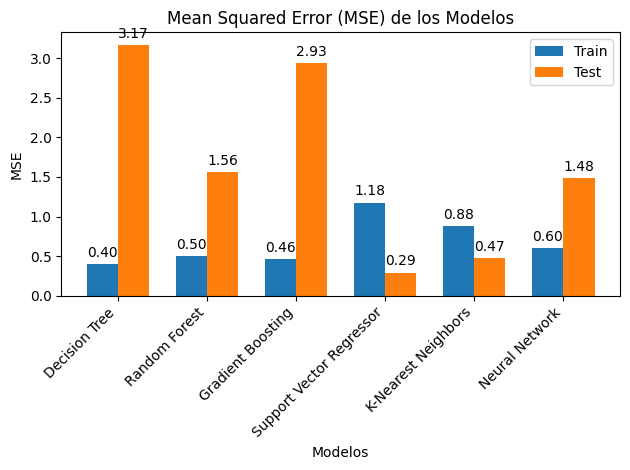

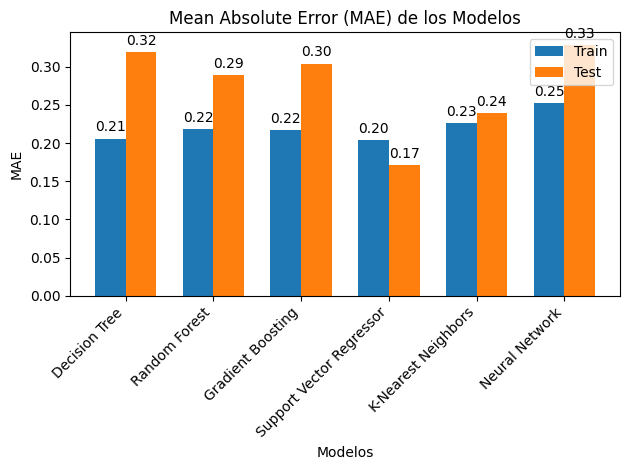

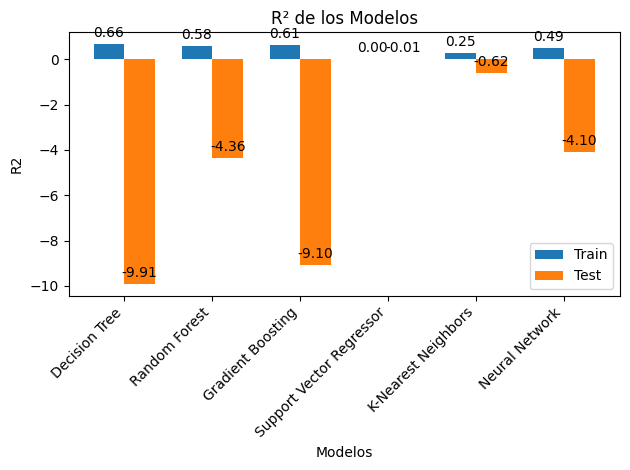

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
# Definir los modelos
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(max_iter=500)
}

# Entrenar y evaluar cada modelo
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results[model_name] = {
        'train': {
            'MSE': mean_squared_error(y_train, y_train_pred),
            'MAE': mean_absolute_error(y_train, y_train_pred),
            'R2': r2_score(y_train, y_train_pred)
        },
        'test': {
            'MSE': mean_squared_error(y_test, y_test_pred),
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'R2': r2_score(y_test, y_test_pred)
        }
    }

# Imprimir los resultados
for model_name, metrics in results.items():
    print(f"Desempeño del modelo: {model_name}")
    print("Conjunto de Entrenamiento:")
    print("MSE:", metrics['train']['MSE'])
    print("MAE:", metrics['train']['MAE'])
    print("R²:", metrics['train']['R2'])
    print("Conjunto de Prueba:")
    print("MSE:", metrics['test']['MSE'])
    print("MAE:", metrics['test']['MAE'])
    print("R²:", metrics['test']['R2'])
    print("\n")

# Visualizar los resultados
def plot_metrics(results, metric, title):
    models = list(results.keys())
    train_scores = [results[model]['train'][metric] for model in models]
    test_scores = [results[model]['test'][metric] for model in models]

    x = np.arange(len(models))  # Posición de las barras
    width = 0.35  # Ancho de las barras

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, train_scores, width, label='Train')
    bars2 = ax.bar(x + width/2, test_scores, width, label='Test')

    # Añadir etiquetas y título
    ax.set_xlabel('Modelos')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.legend()

    # Añadir etiquetas encima de las barras
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)

    plt.tight_layout()
    plt.show()

# Graficar MSE
plot_metrics(results, 'MSE', 'Mean Squared Error (MSE) de los Modelos')

# Graficar MAE
plot_metrics(results, 'MAE', 'Mean Absolute Error (MAE) de los Modelos')

# Graficar R²
plot_metrics(results, 'R2', 'R² de los Modelos')


#Random Forest (de nuevo)

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Cargar y preparar los datos (asegúrate de reemplazar 'df' con tu DataFrame)
X = processed_df.drop(columns=['Total_Duration'])
y = processed_df['Total_Duration']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo para la selección de características
selector_model = RandomForestRegressor(n_estimators=50, random_state=42)
selector_model.fit(X_train_scaled, y_train)

# Usar la importancia de las características para seleccionar las más relevantes
selector = SelectFromModel(selector_model, prefit=True, threshold="mean")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Ver cuántas características se han seleccionado
print("Número de características seleccionadas:", X_train_selected.shape[1])

# Opcional: Ver las características seleccionadas
selected_features = selector.get_support(indices=True)
print("Características seleccionadas:", X.columns[selected_features])


Número de características seleccionadas: 3
Características seleccionadas: Index(['DownStart_dia', 'DayOfWeek', 'Category_Scanner Faults'], dtype='object')


In [20]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.85)  # Mantener el 80% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Número de componentes PCA:", X_train_pca.shape[1])


Número de componentes PCA: 9


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
gb = GradientBoostingRegressor()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'subsample': [0.9, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)

# Ajustar el modelo a los datos de entrenamiento con características seleccionadas
grid_search.fit(X_train_selected, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_selected)
y_test_pred = best_model.predict(X_test_selected)

print("MSE en el conjunto de entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("MSE en el conjunto de prueba:", mean_squared_error(y_test, y_test_pred))
print("R² en el conjunto de entrenamiento:", r2_score(y_train, y_train_pred))
print("R² en el conjunto de prueba:", r2_score(y_test, y_test_pred))


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mejores hiperparámetros encontrados: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}
MSE en el conjunto de entrenamiento: 1.1495283102914842
MSE en el conjunto de prueba: 0.29882484898186795
R² en el conjunto de entrenamiento: 0.023812616885611204
R² en el conjunto de prueba: -0.029023219919395826


#XGB Regressor

In [22]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Definir el modelo XGBoost
xgb_model = xgb.XGBRegressor()

# Definir el espacio de búsqueda de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search_xgb.fit(X_train_selected, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros para XGBoost:", grid_search_xgb.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_xgb_model = grid_search_xgb.best_estimator_
y_train_pred = best_xgb_model.predict(X_train_selected)
y_test_pred = best_xgb_model.predict(X_test_selected)

print("XGBoost - MSE en el conjunto de entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("XGBoost - MSE en el conjunto de prueba:", mean_squared_error(y_test, y_test_pred))
print("XGBoost - R² en el conjunto de entrenamiento:", r2_score(y_train, y_train_pred))
print("XGBoost - R² en el conjunto de prueba:", r2_score(y_test, y_test_pred))

# Definir el modelo LightGBM
lgb_model = lgb.LGBMRegressor()

# Definir el espacio de búsqueda de hiperparámetros para LightGBM
param_grid_lgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search_lgb.fit(X_train_selected, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros para LightGBM:", grid_search_lgb.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_lgb_model = grid_search_lgb.best_estimator_
y_train_pred = best_lgb_model.predict(X_train_selected)
y_test_pred = best_lgb_model.predict(X_test_selected)

print("LightGBM - MSE en el conjunto de entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("LightGBM - MSE en el conjunto de prueba:", mean_squared_error(y_test, y_test_pred))
print("LightGBM - R² en el conjunto de entrenamiento:", r2_score(y_train, y_train_pred))
print("LightGBM - R² en el conjunto de prueba:", r2_score(y_test, y_test_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores hiperparámetros para XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
XGBoost - MSE en el conjunto de entrenamiento: 1.1608160006641155
XGBoost - MSE en el conjunto de prueba: 0.28652698007830996
XGBoost - R² en el conjunto de entrenamiento: 0.014227032235268555
XGBoost - R² en el conjunto de prueba: 0.013325308659811186
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 1592, number of used features: 3
[LightGBM] [Info] Start training from score 0.007454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

#Gradient Boosting Regressor

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Definir el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor()

# Crear un pipeline con selección de características y modelo
pipeline = Pipeline([
    ('anova', SelectKBest(f_regression)),
    ('pca', PCA()),
    ('regressor', gb_model)
])

# Definir los parámetros para GridSearchCV
params = {
    'anova__k': [5, 10, 15],  # Ampliar el rango según la complejidad del problema
    'pca__n_components': [5]  # Ampliar el rango según la cantidad de características
}

# Configurar GridSearchCV con validación cruzada K-fold (por ejemplo, K=5)
kf = KFold(n_splits=8, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=pipeline, param_grid=params, cv=kf, scoring='neg_mean_squared_error', verbose=1)

# Suponiendo que tienes tus datos X_train, y_train, X_test, y_test ya definidos
grid_search.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Obtener los mejores hiperparámetros y resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Calcular y mostrar MSE en el conjunto de entrenamiento promedio
mse_train_avg = -grid_search.best_score_
print("MSE en el conjunto de entrenamiento promedio:", mse_train_avg)

# Calcular y mostrar MSE en el conjunto de prueba
y_pred_test = grid_search.best_estimator_.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE en el conjunto de prueba:", mse_test)

# Calcular y mostrar MAE en el conjunto de entrenamiento promedio
y_pred_train = grid_search.best_estimator_.predict(X_train)
mae_train_avg = mean_absolute_error(y_train, y_pred_train)
print("MAE en el conjunto de entrenamiento promedio:", mae_train_avg)

# Calcular y mostrar MAE en el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)
print("MAE en el conjunto de prueba:", mae_test)

# Calcular y mostrar R² en el conjunto de entrenamiento promedio
r2_train_avg = r2_score(y_train, y_pred_train)
print("R² en el conjunto de entrenamiento promedio:", r2_train_avg)

# Calcular y mostrar R² en el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)
print("R² en el conjunto de prueba:", r2_test)




Fitting 8 folds for each of 3 candidates, totalling 24 fits
Mejores hiperparámetros encontrados: {'anova__k': 5, 'pca__n_components': 5}
MSE en el conjunto de entrenamiento promedio: 1.2280978824663693
MSE en el conjunto de prueba: 2.9218266033379217
MAE en el conjunto de entrenamiento promedio: 0.22456990991438938
MAE en el conjunto de prueba: 0.2956303585889039
R² en el conjunto de entrenamiento promedio: 0.5820644363967454
R² en el conjunto de prueba: -9.061504020354665


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packa

En el contexto del pipeline que has definido para tu modelo de regresión con GridSearchCV, la función ANOVA (SelectKBest) se utiliza como una técnica de selección de características. Más específicamente, ANOVA (Análisis de Varianza) se utiliza para seleccionar las mejores características que más influyen en la variable objetivo (en tu caso, la predicción del modelo).

En resumen, ANOVA a través de SelectKBest ayuda a mejorar la eficiencia del modelo al seleccionar solo las características más relevantes para predecir la variable objetivo, reduciendo así el ruido y mejorando potencialmente la precisión del modelo.

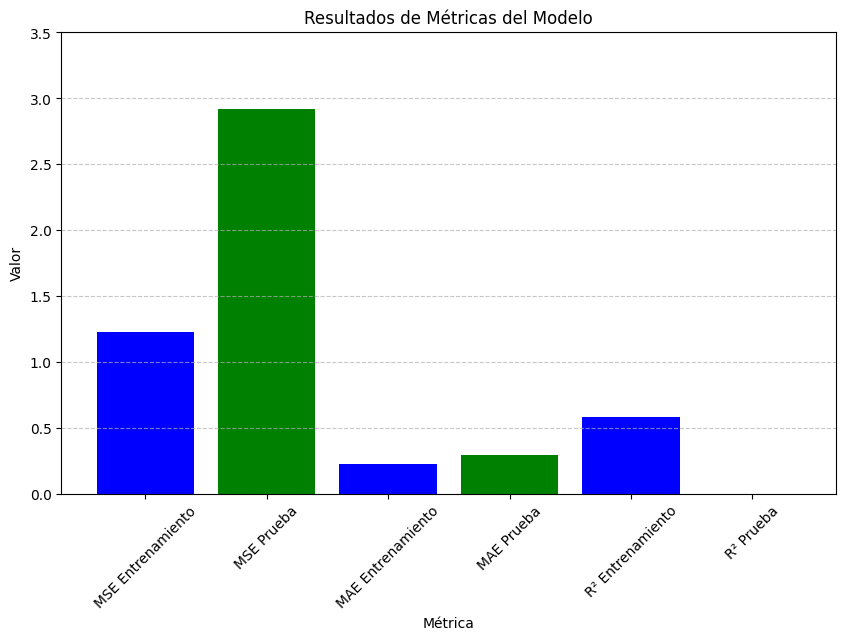

In [24]:
import matplotlib.pyplot as plt

# Métricas obtenidas
metricas = ['MSE Entrenamiento', 'MSE Prueba', 'MAE Entrenamiento', 'MAE Prueba', 'R² Entrenamiento', 'R² Prueba']

# Valores correspondientes a cada métrica
valores = [
    mse_train_avg, mse_test,
    mae_train_avg, mae_test,
    r2_train_avg, r2_test
]

# Graficar en barras
plt.figure(figsize=(10, 6))
plt.bar(metricas, valores, color=['blue', 'green', 'blue', 'green', 'blue', 'green'])
plt.title('Resultados de Métricas del Modelo')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.ylim(0, max(valores) * 1.2)  # Ajustar el rango del eje y para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [25]:
# Genera la impresion de los resultados de las metricas que obtuvimos con los mejores hiperparametros encontrados

# Crear un DataFrame con los resultados
metricas = ['MSE Entrenamiento', 'MSE Prueba', 'MAE Entrenamiento', 'MAE Prueba', 'R² Entrenamiento', 'R² Prueba']
valores = [
    mse_train_avg, mse_test,
    mae_train_avg, mae_test,
    r2_train_avg, r2_test
]

df_metricas = pd.DataFrame({'Métrica': metricas, 'Valor': valores})

# Imprimir el DataFrame
print(df_metricas.to_string())


             Métrica     Valor
0  MSE Entrenamiento  1.228098
1         MSE Prueba  2.921827
2  MAE Entrenamiento  0.224570
3         MAE Prueba  0.295630
4   R² Entrenamiento  0.582064
5          R² Prueba -9.061504
